# **💻INGESTA DE DATOS DESDE UNA API💰**
**COINGECKO💱**

**Diccionario de datos**
* **🔑symbol:** Identificador único en minúsculas según estándar CoinGecko
* **📊current_price:** Precio actual en USD con precisión decimal, actualizado en tiempo real
* **🎯price_change_percentage_24h:** Variación porcentual del precio en las últimas 24 horas exactas
* **💰market_cap:** Capitalización de mercado en USD, calculada en tiempo real
* **📈total_volume:** Volumen total de trading en USD durante últimas 24 horas
* **📊high_24h:** Precio máximo alcanzado durante las últimas 24 horas de trading
* **📊low_24h:** Precio mínimo alcanzado durante las últimas 24 horas de trading
* **🎯trend_classification:** Categorización de tendencia según algoritmo personalizado agregado una ves realizado la limpieza.

In [ ]:
import requests
import pandas as pd

def coingecko_api():
    """
    API de CoinGecko - alternativa confiable
    """
    url = "https://api.coingecko.com/api/v3/coins/markets"

    params = {
        'vs_currency': 'usd',
        'order': 'market_cap_desc',
        'per_page': 100,  # Número de resultados
        'page': 1,
        'sparkline': False
    }

    try:
        r = requests.get(url, params=params, timeout=30)
        print(f"Status Code: {r.status_code}")

        if r.status_code == 200:
            js = r.json()
            df = pd.DataFrame(js)

            # Seleccionar columnas relevantes
            columnas = ['symbol', 'current_price', 'price_change_percentage_24h',
                       'market_cap', 'total_volume', 'high_24h', 'low_24h']

            df = df[columnas]
            print(f"Datos obtenidos: {len(df)} criptomonedas")

            print("\nTop 10 por capitalización de mercado:")
            print(df.head(10))

            return df
        else:
            print(f"Error: {r.status_code}")
            return None

    except Exception as e:
        print(f"Error: {e}")
        return None

df = coingecko_api()

Status Code: 200
Datos obtenidos: 100 criptomonedas

Top 10 por capitalización de mercado:
  symbol  current_price  price_change_percentage_24h     market_cap  \
0    btc  120467.000000                      1.79513  2400721293624   
1    eth    4475.030000                      3.14134   540155048597   
2    xrp       3.040000                      3.17250   181914498259   
3   usdt       1.000000                      0.00503   175814181174   
4    bnb    1087.610000                      6.00597   151462569006   
5    sol     234.430000                      6.24155   127431274716   
6   usdc       0.999716                     -0.00911    74304309389   
7   doge       0.261844                      5.69698    39588804382   
8  steth    4473.560000                      3.25911    38139029546   
9    trx       0.342838                      0.28789    32452243612   

   total_volume       high_24h        low_24h  
0  7.100968e+10  121044.000000  118343.000000  
1  4.432810e+10    4514.810000 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   symbol                       100 non-null    object 
 1   current_price                100 non-null    float64
 2   price_change_percentage_24h  100 non-null    float64
 3   market_cap                   100 non-null    int64  
 4   total_volume                 100 non-null    float64
 5   high_24h                     100 non-null    float64
 6   low_24h                      100 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 5.6+ KB


In [ ]:
# Compruebe si faltan valores en cada columna
missing_values = df.isnull().sum()

# Mostrar el recuento de valores faltantes
print("Valores faltantes por columna")
print(missing_values)

Valores faltantes por columna
symbol                         0
current_price                  0
price_change_percentage_24h    0
market_cap                     0
total_volume                   0
high_24h                       0
low_24h                        0
dtype: int64


In [ ]:
# Completar los valores numéricos faltantes con la mediana de cada columna
for col in df.select_dtypes(include=['float64', 'Int64']).columns:
    if df[col].isnull().any():
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)

# Comprobar si faltan valores restantes
print("Missing values after filling:")
print(df.isnull().sum())

display(df.head())

Missing values after filling:
symbol                         0
current_price                  0
price_change_percentage_24h    0
market_cap                     0
total_volume                   0
high_24h                       0
low_24h                        0
dtype: int64


,symbol,current_price,price_change_percentage_24h,market_cap,total_volume,high_24h,low_24h
0,btc,120467.00,1.79513,2400721293624,7.100968e+10,121044.000,118343.00
1,eth,4475.03,3.14134,540155048597,4.432810e+10,4514.810,4334.97
2,xrp,3.04,3.17250,181914498259,6.804073e+09,3.100,2.94
3,usdt,1.00,0.00503,175814181174,1.326874e+11,1.001,1.00
4,bnb,1087.61,6.00597,151462569006,2.626036e+09,1097.500,1023.46


In [ ]:
df.describe()

,current_price,price_change_percentage_24h,market_cap,total_volume,high_24h,low_24h
count,100.000000,100.000000,1.000000e+02,1.000000e+02,100.000000,100.000000
mean,4182.542270,1.853101,4.240984e+10,3.186013e+09,4203.212706,4094.963911
std,20616.534789,4.779716,2.460388e+11,1.558800e+10,20703.911059,20222.005665
min,0.000010,-37.066630,1.495006e+09,0.000000e+00,0.000010,0.000010
25%,0.808499,0.387092,2.030179e+09,4.070737e+07,0.889428,0.775937
50%,2.610000,2.016850,3.551436e+09,1.679834e+08,2.630000,2.535000
75%,109.770000,3.263555,9.241782e+09,6.464457e+08,113.180000,107.077500
max,120571.000000,10.123120,2.400721e+12,1.326874e+11,121072.000000,118343.000000


In [ ]:
# Primero definir la función
def classify_trend(row):
    """
    Función para clasificar la tendencia.
    """
    price_change_api = row["price_change_percentage_24h"] / 100

    if price_change_api >= 0.05:
        return "Tendencia fuerte alcista"
    elif price_change_api > 0.01:
        return "Tendencia moderada alcista"
    elif price_change_api <= -0.05:
        return "Tendencia fuerte bajista"
    elif price_change_api < -0.01:
        return "Tendencia moderada bajista"
    else:
        return "Tendencia estable"

# Ahora aplicar la función para crear la columna de tendencia
df['tendencia'] = df.apply(classify_trend, axis=1)

# Mostrar los resultados
print("Distribución de tendencias:")
print(df['tendencia'].value_counts())
print("\n" + "="*50 + "\n")

# Mostrar algunas filas con los resultados
print("Primeras 10 filas con la clasificación de tendencia:")
print(df[['current_price', 'price_change_percentage_24h', 'tendencia']].head(10))
print("\n" + "="*50 + "\n")

# Mostrar conteo por categoría de tendencia
print("Resumen de clasificación:")
tendencia_counts = df['tendencia'].value_counts()
for tendencia, count in tendencia_counts.items():
    print(f"{tendencia}: {count} criptomonedas")

# Opcional: Ver estadísticas de price_change_percentage_24h por tendencia
print("\n" + "="*50 + "\n")
print("Estadísticas de cambio porcentual por tendencia:")
print(df.groupby('tendencia')['price_change_percentage_24h'].describe())

Distribución de tendencias:
tendencia
Tendencia moderada alcista    48
Tendencia estable             31
Tendencia fuerte alcista      14
Tendencia moderada bajista     5
Tendencia fuerte bajista       2
Name: count, dtype: int64


Primeras 10 filas con la clasificación de tendencia:
   current_price  price_change_percentage_24h                   tendencia
0  120467.000000                      1.79513  Tendencia moderada alcista
1    4475.030000                      3.14134  Tendencia moderada alcista
2       3.040000                      3.17250  Tendencia moderada alcista
3       1.000000                      0.00503           Tendencia estable
4    1087.610000                      6.00597    Tendencia fuerte alcista
5     234.430000                      6.24155    Tendencia fuerte alcista
6       0.999716                     -0.00911           Tendencia estable
7       0.261844                      5.69698    Tendencia fuerte alcista
8    4473.560000                      3.25911  Ten

# **💻INGESTA DE DATOS DESDE UN ARCHIVO CSV DE KAGGLE💰**
**CRYPTO CURRENCY💱**

Diccionario de datos
* **1️⃣rank:** Posición ranking por capitalización de mercado, donde 1 representa la criptomoneda con mayor market cap
* **💲coin_name:** Nombre comercial completo de la criptomoneda según su proyecto oficial
* **🔑symbol:** TSímbolo ticker utilizado en exchanges para identificar la criptomoneda
* **💵current_price:** Precio de mercado actual expresado en dólares americanos (USD) con formato monetario
* **📊1h:** Cambio porcentual del precio en las últimas 1 hora, indicador de volatilidad a corto plazo
* **📊24h:** Cambio porcentual del precio en las últimas 24 horas, métrica clave para tendencias diarias
* **📊7d:** Cambio porcentual del precio en los últimos 7 días, indicador de tendencia semanal
* **📊30d:** Cambio porcentual del precio en los últimos 30 días, perspectiva de tendencia mensual
* **📊24h_volume:** Volumen total de trading en dólares durante las últimas 24 horas, indicador de liquidez
* **📈circulating_supply:** Cantidad de monedas actualmente en circulación y disponibles en el mercado
* **💱total_supply:** Suministro máximo total que existirá para la criptomoneda, incluye no circulante
* **💰market_cap:** Capitalización de mercado calculada como Precio × Circulating Supply
* **🎯is_outlier:** Para clasificar a los datos que tienen un precio atipico, con el fin de no eliminarlo, dado el entorno de volatilidad que tiene este sector


In [ ]:
# Carga el archivo CSV
btcusd_df = pd.read_csv("/content/CryptocurrencyData.csv")

# Muestra las primeras filas del DataFrame para verificar que se cargó correctamente
display(btcusd_df.head())

,Rank,Coin Name,Symbol,Price,1h,24h,7d,30d,24h Volume,Circulating Supply,Total Supply,Market Cap
0,1,Bitcoin,BTC,"36,456.94",0.40%,-1.70%,1.00%,18.40%,"$22,801,222,945.00","19,549,806",21 Million,"$712,726,163,003.00"
1,2,Ethereum,ETH,"2,027.60",0.50%,1.40%,1.00%,20.70%,"$26,845,710,464.00","120,249,015",120 Million,"$243,488,187,281.00"
2,3,Tether,USDT,1.00,0.10%,-0.30%,-0.10%,-0.10%,"$47,122,466,339.00","88,308,652,879",88.3 Billion,"$88,027,617,310.00"
3,4,BNB,BNB,231.63,-0.10%,-12.60%,-8.00%,5.40%,"$3,715,265,116.00","153,856,150",154 Million,"$35,716,332,862.00"
4,5,XRP,XRP,0.59,0.10%,-1.90%,-6.90%,12.10%,"$1,339,890,506.00","53,718,306,475",100 Billion,"$31,863,926,051.00"


In [ ]:
btcusd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Rank                4150 non-null   int64 
 1   Coin Name           4150 non-null   object
 2   Symbol              4150 non-null   object
 3    Price              4150 non-null   object
 4   1h                  4055 non-null   object
 5   24h                 4150 non-null   object
 6   7d                  4148 non-null   object
 7   30d                 4093 non-null   object
 8    24h Volume         4150 non-null   object
 9   Circulating Supply  4150 non-null   object
 10  Total Supply        4150 non-null   object
 11   Market Cap         4150 non-null   object
dtypes: int64(1), object(11)
memory usage: 389.2+ KB


Limpieza de los datos

In [ ]:
# Quitar espacios al inicio y final de los nombres de columnas
btcusd_df.columns = btcusd_df.columns.str.strip()

# Renombrar columnas del DataFrame btcusd_df
btcusd_df = btcusd_df.rename(columns={
    'Coin Name': 'coin',
    'Symbol': 'symbol',
    'Price': 'current_price',
    '24h Volume': '24h_volume',
    'Circulating Supply': 'circulating_supply',
    'Total Supply': 'total_supply',
    'Market Cap': 'market_cap'
})
#Eliminando la columna Rank
btcusd_df = btcusd_df.drop(columns=['Rank'])

In [ ]:
#Elimina todas las comas (,) de los valores de la variable de "current_price" y los convierte a numero
btcusd_df['current_price'] = btcusd_df['current_price'].astype(str).str.replace(',', '', regex=False)
btcusd_df['current_price'] = pd.to_numeric(btcusd_df['current_price'], errors='coerce')

#Elimina todas las comas (,) de los valores de la variable de "circulating_supply" y los convierte a numero
btcusd_df['circulating_supply'] = btcusd_df['circulating_supply'].astype(str).str.replace(',', '', regex=False)
btcusd_df['circulating_supply'] = pd.to_numeric(btcusd_df['circulating_supply'], errors='coerce')

In [ ]:
#Convierte las columnas '1h', '24h', '7d', '30d' en porcentaje, sacando el simbolo de porcentaje de la misma (%)
percentage_cols = ['1h', '24h', '7d', '30d']
for col in percentage_cols:
    btcusd_df[col] = btcusd_df[col].astype(str).str.replace('%', '', regex=False)
    btcusd_df[col] = pd.to_numeric(btcusd_df[col], errors='coerce')
    btcusd_df[col] = btcusd_df[col] / 100

In [ ]:
# Crea una variable llamada volume_market_cols
volume_market_cols = ['24h_volume', 'market_cap']
for col in volume_market_cols:
    # Eliminar '$' y "," manejando los espacios potenciales
    btcusd_df[col] = btcusd_df[col].astype(str).str.replace(r'[$, ]', '', regex=True)
    # Convierte a numeros flotante, forzando errores
    btcusd_df[col] = pd.to_numeric(btcusd_df[col], errors='coerce')

In [ ]:
# Se crea un funcion para poder convertir los valores en numeros, considerando que estos datos tienen texto de "millones" y "billones", para ello se debe eliminar este texto
def clean_total_supply(supply_str):
    if pd.isna(supply_str) or supply_str == '-' or supply_str == '':
        return pd.NA

    supply_str = str(supply_str).replace(',', '').replace('$', '').strip()
    supply_str = supply_str.replace(' ', '') # Elimina los espacios restantes

    if 'Billion' in supply_str:
        supply_str = supply_str.replace('Billion', '')
        try:
            return int(float(supply_str) * 1_000_000_000)
        except ValueError:
            return pd.NA
    elif 'Million' in supply_str:
        supply_str = supply_str.replace('Million', '')
        try:
            return int(float(supply_str) * 1_000_000)
        except ValueError:
            return pd.NA
    else:
        try:
            # Maneja casos que son solo números o tienen puntos decimales
            return int(float(supply_str))
        except ValueError:
            return pd.NA

btcusd_df['total_supply'] = btcusd_df['total_supply'].apply(clean_total_supply)
btcusd_df['total_supply'] = btcusd_df['total_supply'].astype('Int64')

display(btcusd_df.head())
display(btcusd_df.info())

,coin,symbol,current_price,1h,24h,7d,30d,24h_volume,circulating_supply,total_supply,market_cap
0,Bitcoin,BTC,36456.94,0.004,-0.017,0.010,0.184,2.280122e+10,1.954981e+07,21000000,7.127262e+11
1,Ethereum,ETH,2027.60,0.005,0.014,0.010,0.207,2.684571e+10,1.202490e+08,120000000,2.434882e+11
2,Tether,USDT,1.00,0.001,-0.003,-0.001,-0.001,4.712247e+10,8.830865e+10,88300000000,8.802762e+10
3,BNB,BNB,231.63,-0.001,-0.126,-0.080,0.054,3.715265e+09,1.538562e+08,154000000,3.571633e+10
4,XRP,XRP,0.59,0.001,-0.019,-0.069,0.121,1.339891e+09,5.371831e+10,100000000000,3.186393e+10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   coin                4150 non-null   object 
 1   symbol              4150 non-null   object 
 2   current_price       2424 non-null   float64
 3   1h                  3603 non-null   float64
 4   24h                 3698 non-null   float64
 5   7d                  3696 non-null   float64
 6   30d                 3641 non-null   float64
 7   24h_volume          3666 non-null   float64
 8   circulating_supply  4150 non-null   float64
 9   total_supply        3655 non-null   Int64  
 10  market_cap          3740 non-null   float64
dtypes: Int64(1), float64(8), object(2)
memory usage: 360.8+ KB


None

In [ ]:
# Compruebe si faltan valores en cada columna
missing_values = btcusd_df.isnull().sum()

# Mostrar el recuento de valores faltantes
print("Missing values per column:")
print(missing_values)

Missing values per column:
coin                     0
symbol                   0
current_price         1726
1h                     547
24h                    452
7d                     454
30d                    509
24h_volume             484
circulating_supply       0
total_supply           495
market_cap             410
dtype: int64


Validacion de los datos

In [ ]:
# Completar los valores numéricos faltantes con la mediana de cada columna
for col in btcusd_df.select_dtypes(include=['float64', 'Int64']).columns:
    if btcusd_df[col].isnull().any():
        median_value = btcusd_df[col].median()
        btcusd_df[col] = btcusd_df[col].fillna(median_value)

# Comprobar si faltan valores restantes
print("Missing values after filling:")
print(btcusd_df.isnull().sum())

display(btcusd_df.head())

Missing values after filling:
coin                  0
symbol                0
current_price         0
1h                    0
24h                   0
7d                    0
30d                   0
24h_volume            0
circulating_supply    0
total_supply          0
market_cap            0
dtype: int64


,coin,symbol,current_price,1h,24h,7d,30d,24h_volume,circulating_supply,total_supply,market_cap
0,Bitcoin,BTC,36456.94,0.004,-0.017,0.010,0.184,2.280122e+10,1.954981e+07,21000000,7.127262e+11
1,Ethereum,ETH,2027.60,0.005,0.014,0.010,0.207,2.684571e+10,1.202490e+08,120000000,2.434882e+11
2,Tether,USDT,1.00,0.001,-0.003,-0.001,-0.001,4.712247e+10,8.830865e+10,88300000000,8.802762e+10
3,BNB,BNB,231.63,-0.001,-0.126,-0.080,0.054,3.715265e+09,1.538562e+08,154000000,3.571633e+10
4,XRP,XRP,0.59,0.001,-0.019,-0.069,0.121,1.339891e+09,5.371831e+10,100000000000,3.186393e+10


In [ ]:
btcusd_df.describe()

,current_price,1h,24h,7d,30d,24h_volume,circulating_supply,total_supply,market_cap
count,4150.000000,4150.000000,4150.000000,4150.000000,4150.000000,4.150000e+03,4.150000e+03,4150.0,4.150000e+03
mean,176.445752,0.001680,0.000304,0.045913,1.033060,3.661606e+07,1.333716e+20,9129489542.16482,3.477940e+08
std,2831.812431,0.047573,0.185884,1.033146,37.017165,9.548420e+08,7.176358e+21,57572093295.099457,1.181540e+10
min,0.010000,-0.418000,-0.909000,-0.970000,-0.995000,1.000000e-02,0.000000e+00,1000000.0,2.000000e-02
25%,0.070000,-0.002000,-0.040000,-0.082000,0.000000,5.184000e+03,6.817496e+06,94275000.0,2.892728e+05
50%,0.110000,0.000000,-0.011000,-0.019000,0.141000,4.360200e+04,8.184667e+07,327000000.0,1.591722e+06
75%,0.160000,0.004000,0.012000,0.031000,0.361750,2.831420e+05,6.255787e+08,1000000000.0,9.670877e+06
max,109861.000000,2.155000,5.008000,58.335000,2375.667000,4.712247e+10,4.507743e+23,999000000000.0,7.127262e+11


In [ ]:
#Observar los datos duplicados
print(btcusd_df.duplicated().sum())

0


Clasificacion y procesamiento de los datos

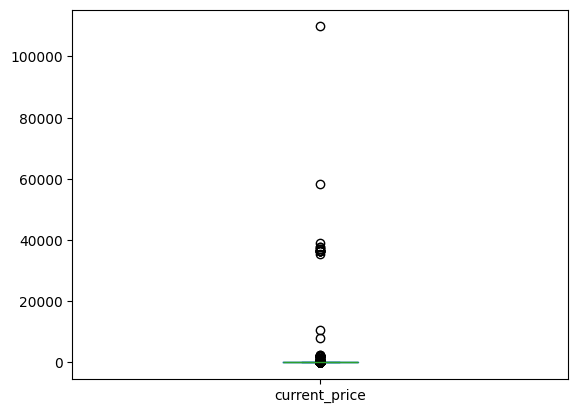

In [ ]:
import matplotlib.pyplot as plt
btcusd_df['current_price'].plot(kind='box')
plt.show()

In [ ]:
#Observacion de los outliers
q1 = btcusd_df['current_price'].quantile(0.25)
q3 = btcusd_df['current_price'].quantile(0.75)
iqr = q3 - q1

# Definir umbrales
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Marcar outliers sin eliminarlos
btcusd_df['is_outlier'] = ~btcusd_df['current_price'].between(lower, upper)
btcusd_df.head()

,coin,symbol,current_price,1h,24h,7d,30d,24h_volume,circulating_supply,total_supply,market_cap,is_outlier
0,Bitcoin,BTC,36456.94,0.004,-0.017,0.010,0.184,2.280122e+10,1.954981e+07,21000000,7.127262e+11,True
1,Ethereum,ETH,2027.60,0.005,0.014,0.010,0.207,2.684571e+10,1.202490e+08,120000000,2.434882e+11,True
2,Tether,USDT,1.00,0.001,-0.003,-0.001,-0.001,4.712247e+10,8.830865e+10,88300000000,8.802762e+10,True
3,BNB,BNB,231.63,-0.001,-0.126,-0.080,0.054,3.715265e+09,1.538562e+08,154000000,3.571633e+10,True
4,XRP,XRP,0.59,0.001,-0.019,-0.069,0.121,1.339891e+09,5.371831e+10,100000000000,3.186393e+10,True


Almacenamiento de datos

In [ ]:
# Guardado del DataFrame de la API en un archivo CSV
df.to_csv('/content/api_cryptocurrency_data.csv', index=False)

print("Datos de la API guardados como: 'api_cryptocurrency_data.csv'")

Datos de la API guardados como: 'api_cryptocurrency_data.csv'


In [ ]:
# Guardado del DataFrame de Kaggle en un archivo CSV (historico)

btcusd_df.to_csv('/content/cleaned_cryptocurrency_data.csv', index=False)

print("Datos historicos posterior a la limpieza guardados como: 'cleaned_cryptocurrency_data.csv'")

Datos historicos posterior a la limpieza guardados como: 'cleaned_cryptocurrency_data.csv'


Reporte de calidad con ProfileReport

In [ ]:
!pip install ydata_profiling pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2


In [ ]:
from ydata_profiling import ProfileReport
import pandas as pd

#Reporte para los datos extraido de la API de CoinGecko
df = pd.read_csv("/content/api_cryptocurrency_data.csv")
profile = ProfileReport(df, title="Reporte de Calidad - Criptomonedas API")
profile.to_file("cryptos_api_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:00<00:00, 68.60it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport

#Reporte para los datos extraido de la API de CoinGecko
df = pd.read_csv("/content/cleaned_cryptocurrency_data.csv")
# Generar el reporte con el modo mínimo (minimiza la memoria usada)
profile = ProfileReport(df, title="Reporte de Calidad - Criptomonedas", minimal=True)
# Guardar el archivo
profile.to_file("cryptos_kaggle_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 11/11 [00:00<00:00, 16.11it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]